## Vaishna Subbaiah

### 10/17/25

#### Objective: Perform data analysis and visualization to answer special questions I created from Part 1 about the Major Survey data, providing insights to guide CCM IT Department's recruiting efforts.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Load cleaned data

In [16]:
df = pd.read_csv("cleaned_majors_survey.csv")

#### 1. Recruitment Influence on CMP 128 Computer Science I Students
###### "Which methods were most effective in attracting individuals interested in computing classes and majors (for example, social media, teachers/counselors, etc.)?"

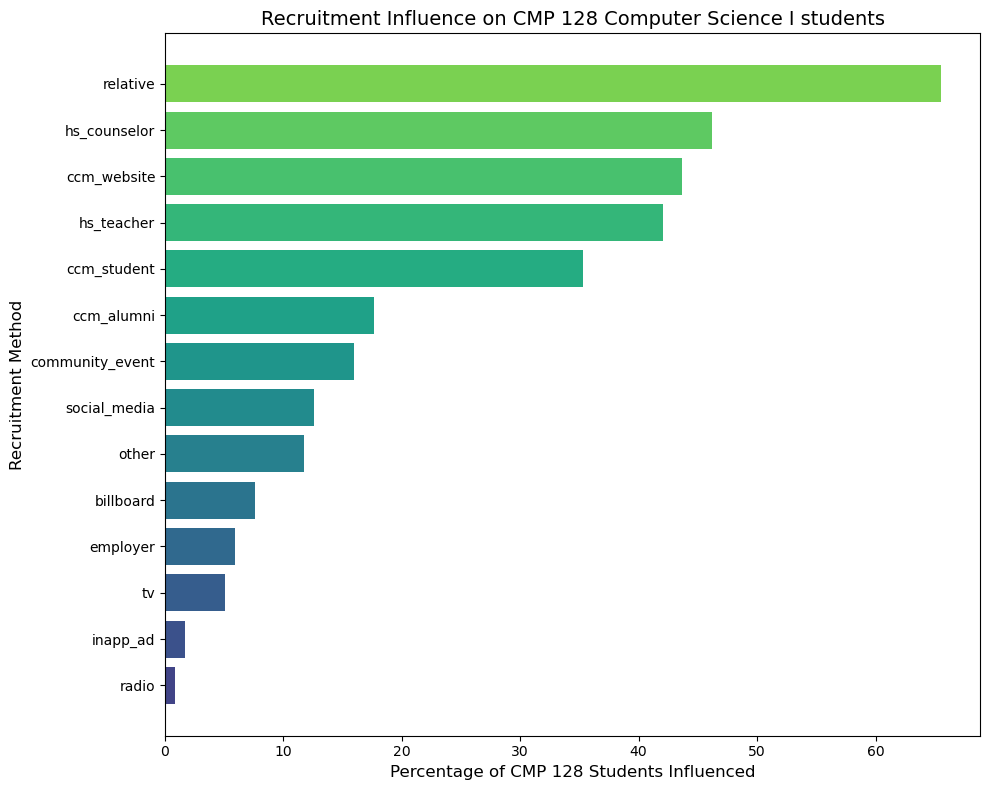

In [17]:
# 1. filter the dataframe to only include students in CMP 128
target_course = 'CMP 128 Computer Science I'
course_128_df = df[df['course'] == target_course].copy()
total_respondents_128 = len(course_128_df)

# 2. define recruitment columns
recruitment_columns = [
    'relative', 'hs_counselor', 'ccm_website', 'hs_teacher',
    'ccm_student', 'ccm_alumni', 'community_event', 'social_media',
    'other', 'billboard', 'employer', 'tv', 'inapp_ad', 'radio'
]

# 3. convert Yes/No responses to numeric (1 for Yes, 0 otherwise)
course_128_df[recruitment_columns] = (
    course_128_df[recruitment_columns]
    .apply(lambda col: col.str.strip().str.lower().map({'yes': 1, 'no': 0, "don't recall": 0}))
    .fillna(0)
)

# calculate effectiveness percentages
recruitment_effectiveness_128 = (
    course_128_df[recruitment_columns].sum() / total_respondents_128 * 100
)

# 4. sort results
recruitment_effectiveness_sorted_128 = recruitment_effectiveness_128.sort_values(ascending=True)

# 5. prepare data for plotting
methods = recruitment_effectiveness_sorted_128.index
percentages = recruitment_effectiveness_sorted_128.values

# 6. create horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(methods, percentages, color=plt.cm.viridis(np.linspace(0.2, 0.8, len(methods))))
plt.title(f'Recruitment Influence on CMP 128 Computer Science I students', fontsize=14)
plt.xlabel('Percentage of CMP 128 Students Influenced', fontsize=12)
plt.ylabel('Recruitment Method', fontsize=12)
plt.tight_layout()
plt.savefig('recruitment_effectiveness_cmp128_bar_chart_mpl_fixed.png')
plt.show()


##### This graph specifically showcases the percentage of CMP 128 students and how they were influenced to join CCM and take the course. As shown above, most students were influenced by a relative, so a family or friend, while the lowest percentage of students taking CMP 128 were influenced by the radio. The IT Department should heavily invest in High School Counselor and Teacher outreach programs and ensure that the CCM website has clear, attractive information specifically about the CMP 128 course and the Computer Science pathway. This can help to recruit more high school students, boosting the 

### 2. Gender Demographics of Computing Majors
###### "What demographic of people mainly applied to be computing majors (for example, gender, race/ethnicity, etc.)?"

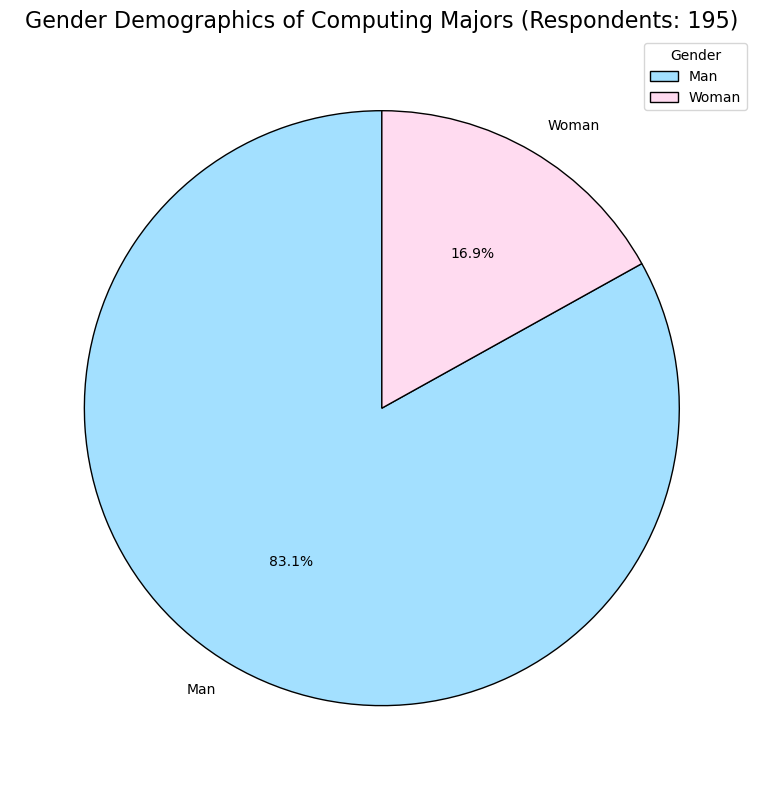

In [18]:
# 1. Load your CSV file (adjust the path if needed)
majors_df = pd.read_csv('cleaned_majors_survey.csv')

# 2. Analyze gender demographics
gender_counts = majors_df['gender'].value_counts()
gender_for_plot = gender_counts[gender_counts.index != 'Prefer not to say']
gender_percentages = gender_for_plot / gender_for_plot.sum() * 100

# 3. Total number of respondents
total_majors = gender_for_plot.sum()

# 4. Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gender_percentages,
    labels=gender_percentages.index,
    autopct='%1.1f%%',       # format to one decimal place
    startangle=90,           # start the largest slice at the top
    colors=['#A3E0FF', '#FFDBF0'],  # manually select colors
    wedgeprops={'edgecolor': 'black'}
)

plt.title(f'Gender Demographics of Computing Majors (Respondents: {total_majors})', fontsize=16)
plt.legend(gender_percentages.index, title="Gender", loc="upper right")
plt.tight_layout()

# 5. Save the plot
plt.savefig('gender_demographics_computing_majors_pie_chart_mpl.png')
plt.show()

##### This pie chart shows the viewer the percentage of men in comparison to women regarding how many of them selected a degree in the computing major. As shown above, there is an obvious difference in the percentage of men who take a computing major at CCM versus the percentage of women who take a computing major at CCM, which illustrates a severe gender imbalance, a common issue in STEM fields. To mitigate this effect, the department can focus substantial recruiting efforts on increasing the representation of women. There can also be more promotional materials, campus visits, and digital ads that feature successful women in the CCM computing programs or careers to provide relatable role models. We should create mentorship opportunities, such as Women Who Dare, specifically to recruit and support women in computing.

### 3. Primary Career Motivations for Computing Majors
###### "What are the main motivations for a career in computing (for example, career change, job advancement, etc.)?"

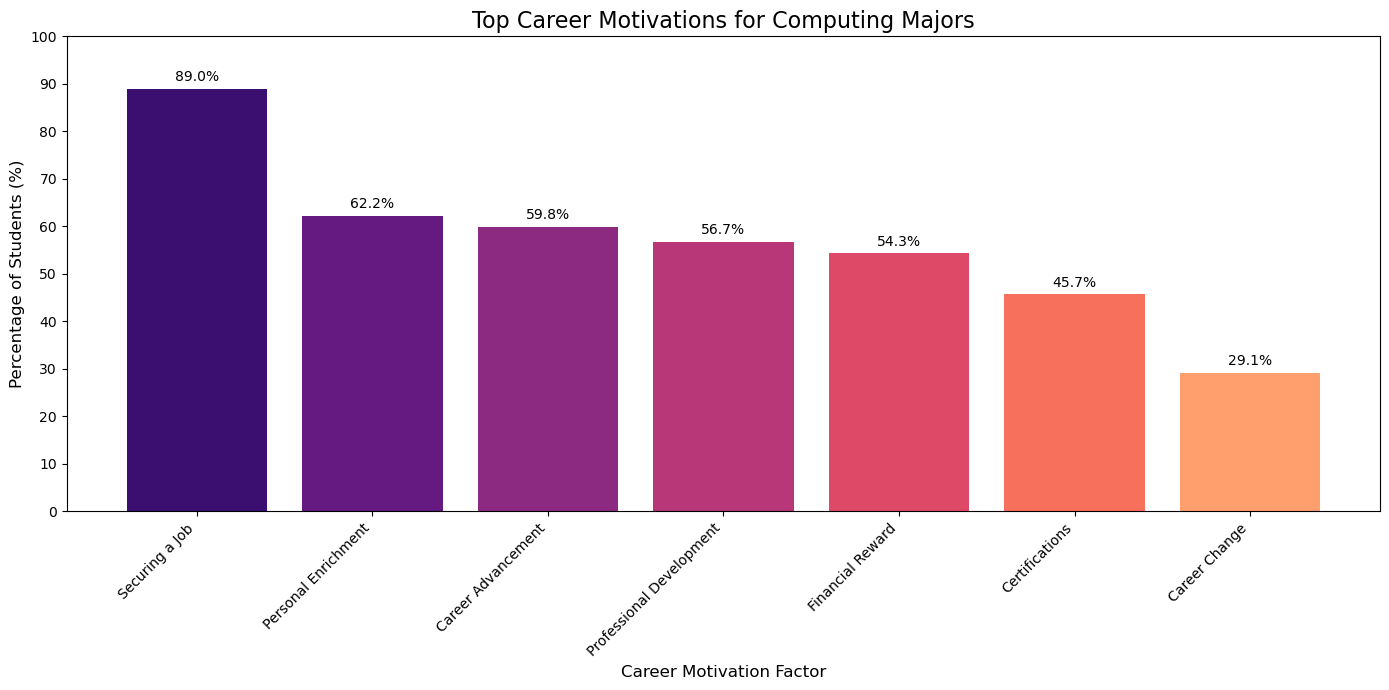

In [19]:
# 1. Filter the dataframe to only include computing majors
computing_terms = [
    'computer science', 'cis', 'information technology', 
    'cybersecurity', 'data science', 'data analytics', 'information security'
]
df['degree_program'] = df['degree_program'].astype(str).str.lower()
is_computing_major = df['degree_program'].apply(
    lambda x: any(term in x for term in computing_terms)
)
majors_df = df[is_computing_major].copy()
total_majors = len(majors_df)

# --- CAREER MOTIVATIONS ANALYSIS ---
# 2. Define career motivation columns with ONLY the 7 requested factors
motivation_cols = [
    'motivation_job', 'enrichment', 'career_advancement',
    'professional_dev', 'financial', 'certifications', 'career_change'
]

# 3. Calculate motivation percentages
motivation_counts = majors_df[motivation_cols].apply(lambda x: (x == 'Yes').sum())
motivation_percentages = (motivation_counts / total_majors) * 100
motivation_percentages_sorted = motivation_percentages.sort_values(ascending=False)

# 4. Prepare data for plotting
# Create descriptive labels for better visualization
label_map = {
    'motivation_job': 'Securing a Job',
    'enrichment': 'Personal Enrichment',
    'career_advancement': 'Career Advancement',
    'professional_dev': 'Professional Development',
    'financial': 'Financial Reward',
    'certifications': 'Certifications',
    'career_change': 'Career Change'
}
labels = [label_map[col] for col in motivation_percentages_sorted.index]
percentages = motivation_percentages_sorted.values

# 5. Create vertical bar chart (matplotlib only)
plt.figure(figsize=(14,7))

# Use plt.bar for vertical bars
bars = plt.bar(labels, percentages, color=plt.cm.magma(np.linspace(0.2, 0.8, len(labels))))

# Add percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    # Add percentage symbol and format to one decimal place
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, 
             f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title(f'Top Career Motivations for Computing Majors', fontsize=16)
plt.ylabel('Percentage of Students (%)', fontsize=12)
plt.xlabel('Career Motivation Factor', fontsize=12)
plt.xticks(rotation=45, ha='right') # rotate x-labels for readability
plt.yticks(np.arange(0, 101, 10)) 
# NOTE: plt.grid() has been omitted to remove the grid.

plt.tight_layout()
# save the plot
plt.savefig('career_motivation_vertical_bar_chart_7_factors.png')
plt.show()

##### This vertical bar graph displays the main motivations for a career in computing. The graph highlights that the overwhelming primary driver for students entering computing majors is highly practical: securing a job (almost 90%). The secondary drivers (Enrichment, Career Advancement, Professional Development, and Financial) also rank highly. I believe CCM should emphasize the continuous growth and stability of a computing career, appealing to as many career motivation factors as possible. Since securing a job is a motivating factor for a majority of students, all recruiting messaging (digital ads, website copy, print materials) should feature job placement rates, high starting salaries, and career opportunities, focusing more on the direct pathway to employment.

### 4. Factors for Choosing CCM
###### "What were the strongest factors in choosing to go to CCM (for example, affordability, location, etc.)?"

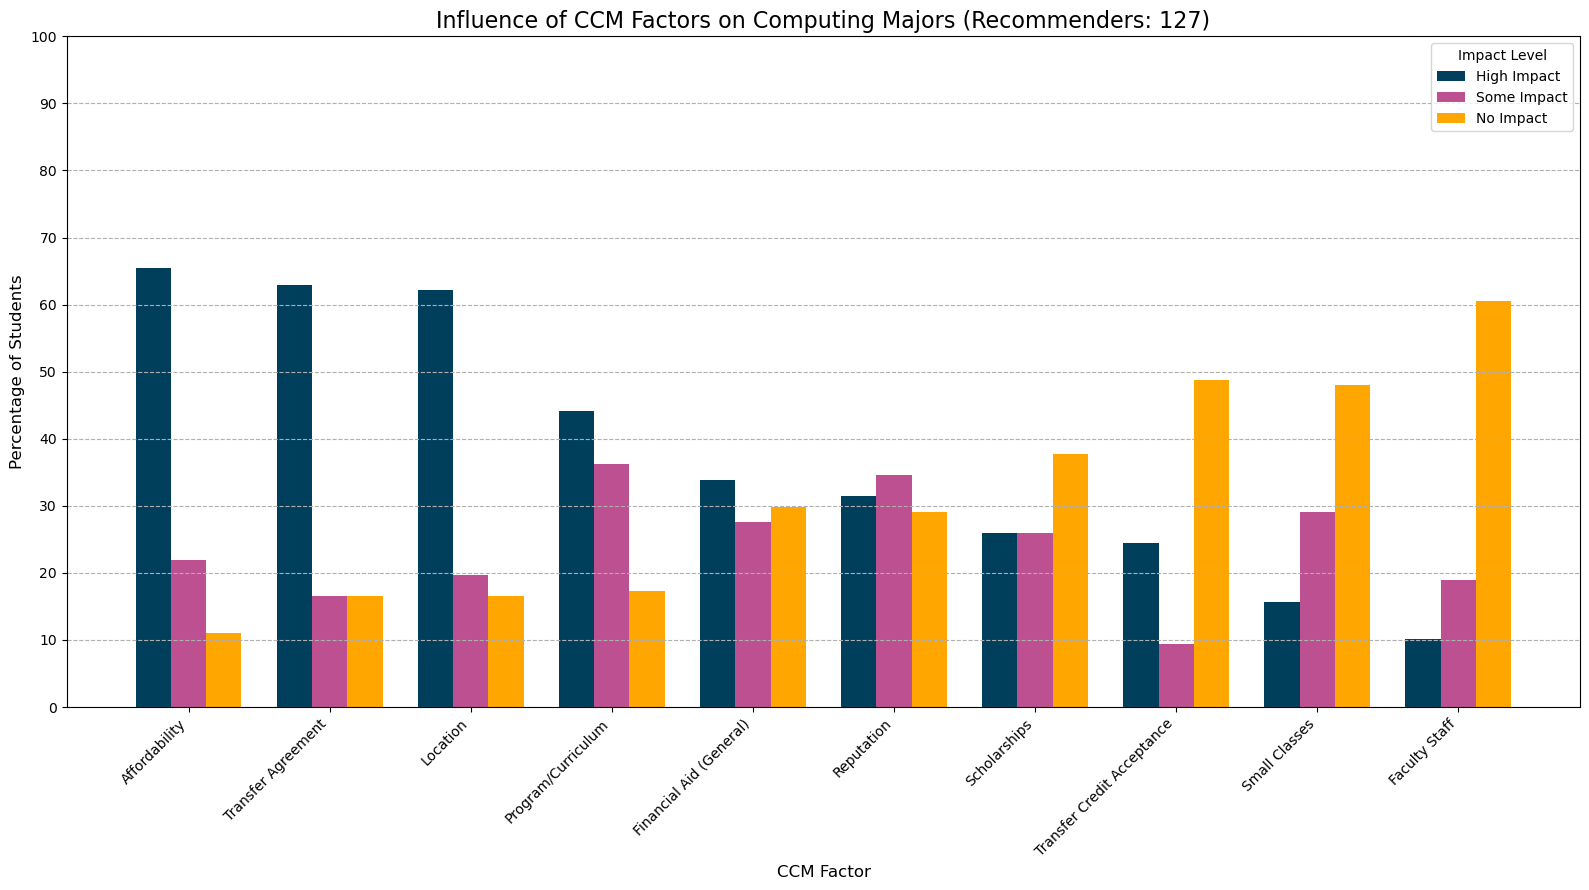

In [20]:
# define terms to identify computing majors
computing_terms = [
    'computer science', 'cis', 'information technology', 
    'cybersecurity', 'data science', 'data analytics', 'information security'
]
df['degree_program'] = df['degree_program'].astype(str).str.lower()
is_computing_major = df['degree_program'].apply(
    lambda x: any(term in x for term in computing_terms)
)
majors_df = df[is_computing_major].copy()
total_majors = len(majors_df)

# 1. define columns and calculate percentages
choice_factor_cols = [
    'affordability', 'location', 'program_choice', 'transfer_credits', 
    'financial_aid', 'reputation', 'small_classes', 'faculty_staff', 
    'transferability', 'scholarships'
]

# the three correct impact categories used in the survey
impact_categories = ['High Impact', 'Some Impact', 'No Impact']

results = {}

for col in choice_factor_cols:
    results[col] = {}
    for impact in impact_categories:
        # calculate the percentage for each factor and impact level
        impact_count = (majors_df[col] == impact).sum()
        impact_percent = (impact_count / total_majors) * 100
        results[col][impact] = impact_percent

# 2. prepare data for plotting
impact_df = pd.DataFrame(results).T

# rename index for cleaner plot labels
impact_df.index = impact_df.index.str.replace('_', ' ').str.title()
impact_df.index = impact_df.index.str.replace('Program Choice', 'Program/Curriculum')
impact_df.index = impact_df.index.str.replace('Transfer Credits', 'Transfer Credit Acceptance')
impact_df.index = impact_df.index.str.replace('Transferability', 'Transfer Agreement')
impact_df.index = impact_df.index.str.replace('Financial Aid', 'Financial Aid (General)')

# sort the factors by the 'High Impact' percentage
impact_df = impact_df.sort_values(by='High Impact', ascending=False)

labels = impact_df.index
data_high = impact_df['High Impact'].round(1).values
data_some = impact_df['Some Impact'].round(1).values
data_no = impact_df['No Impact'].round(1).values

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

# 3. create grouped bar chart
plt.figure(figsize=(16, 9))

# plot the three groups using distinct colors
rects1 = plt.bar(x - width, data_high, width, label='High Impact', color='#003f5c')
rects2 = plt.bar(x, data_some, width, label='Some Impact', color='#bc5090')
rects3 = plt.bar(x + width, data_no, width, label='No Impact', color='#ffa600')

# add labels, title, and custom x-axis tick labels
plt.title(f'Influence of CCM Factors on Computing Majors (Recommenders: {total_majors})', fontsize=16)
plt.ylabel('Percentage of Students', fontsize=12)
plt.xlabel('CCM Factor', fontsize=12)
plt.xticks(x, labels, rotation=45, ha='right')
plt.yticks(np.arange(0, 101, 10))
plt.legend(title='Impact Level')
plt.grid(axis='y', linestyle='--')

plt.tight_layout()

##### The grouped bar chart provides the definitive insight into the priorities of Computing Majors (127 responders). It shows that the most powerful factor driving Computing Majors to CCM is Affordability (65.4% High Impact), while cost is ignored by the fewest students (11.0% No Impact). The next key decision-makers are the Program/Curriculum and Reputation (both around 45-50% High Impact). Based on these findings, the CCM IT Department should immediately focus all recruitment and messaging efforts on two things: Emphasizing Value, leading with cost savings and affordability over all other topics, and Highlight Quality, showing the academic rigor by promoting specific, in-demand course offerings, student project success, and faculty expertise to satisfy the strong demand for a quality curriculum and good reputation. 

### Citations: I used Google Gemini to help me if I had questions about creating the graphs and for any questions I had about clarifying what the instructions wanted me to do. I also used ChatGPT to help me figure out what code was missing for the first two graphs.